In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider

In [2]:
def dynamics_part_a(t, y, eps):
    x1, x2 = y
    dx1dt = x2
    dx2dt = x1 - x1**3 - eps * x2
    
    return [dx1dt, dx2dt]

In [3]:
def plot_phase_portrait(eps=0.5):
    x_range = np.linspace(-3, 3, 20)
    x2_range = np.linspace(-3, 3, 20)
    X, X2 = np.meshgrid(x_range, x2_range)
    fig, ax = plt.subplots(figsize=(10, 8))
    
    dx1 = X2.copy()
    dx2 = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            _, dx2_val = dynamics_part_a(0, [X[i, j], X2[i, j]], eps)
            if dx2_val is not None:
                dx2[i, j] = dx2_val
    
    ax.streamplot(X, X2, dx1, dx2, color='blue', linewidth=0.8, density=1.2)
    colors = plt.cm.rainbow(np.linspace(0, 1, 12))
    
    for i, color in enumerate(colors):
        angle = 2 * np.pi * i / len(colors)
        r = 2
        y0 = [r * np.cos(angle), r * np.sin(angle)]
        try:
            sol = solve_ivp(dynamics_part_a, [0, 50], y0, args=(eps,), 
                           dense_output=True, max_step=0.1)
            if sol.t.size > 0:
                ax.plot(sol.y[0], sol.y[1], color=color, alpha=0.7, linewidth=1.5)
                ax.plot(sol.y[0][0], sol.y[1][0], 'o', color=color, markersize=6)
        except:
            pass
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('ẋ', fontsize=12)
    ax.set_title(f'Phase Portrait for Part (a): ε = {eps:.2f}', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

interact(plot_phase_portrait, eps=FloatSlider(min=-3, max=3, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='eps', max=3.0, min=-3.0), Output()), _dom_classes=('…

<function __main__.plot_phase_portrait(eps=0.5)>

In [4]:
def dynamics_part_b(t, y, eps):
    x1, x2 = y
    dx1dt = x2
    dx2dt = - eps * x2**3 - np.sin(x1)
    
    return [dx1dt, dx2dt]

In [5]:
def dynamics_part_c(t, y):
    x1, x2 = y
    dx1dt = -x1 + x1**2
    dx2dt = x1 + x2
    
    return [dx1dt, dx2dt]

In [6]:
def plot_phase_portrait_b(eps=0.5):
    x_range = np.linspace(-np.pi, np.pi, 20)
    x2_range = np.linspace(-3, 3, 20)
    X, X2 = np.meshgrid(x_range, x2_range)
    fig, ax = plt.subplots(figsize=(10, 8))
    
    dx1 = X2.copy()
    dx2 = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            _, dx2_val = dynamics_part_b(0, [X[i, j], X2[i, j]], eps)
            if dx2_val is not None:
                dx2[i, j] = dx2_val
    
    ax.streamplot(X, X2, dx1, dx2, color='blue', linewidth=0.8, density=1.2)
    colors = plt.cm.rainbow(np.linspace(0, 1, 12))
    
    for i, color in enumerate(colors):
        angle = 2 * np.pi * i / len(colors)
        r = 2
        y0 = [r * np.cos(angle), r * np.sin(angle)]
        try:
            sol = solve_ivp(dynamics_part_b, [0, 50], y0, args=(eps,), 
                           dense_output=True, max_step=0.1)
            if sol.t.size > 0:
                ax.plot(sol.y[0], sol.y[1], color=color, alpha=0.7, linewidth=1.5)
                ax.plot(sol.y[0][0], sol.y[1][0], 'o', color=color, markersize=6)
        except:
            pass
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('ẋ', fontsize=12)
    ax.set_title(f'Phase Portrait for Part (b): ε = {eps:.2f}', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-3, 3)
    ax.set_aspect('auto')
    plt.tight_layout()
    plt.show()

interact(plot_phase_portrait_b, eps=FloatSlider(min=-2, max=2, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='eps', max=2.0, min=-2.0), Output()), _dom_classes=('…

<function __main__.plot_phase_portrait_b(eps=0.5)>

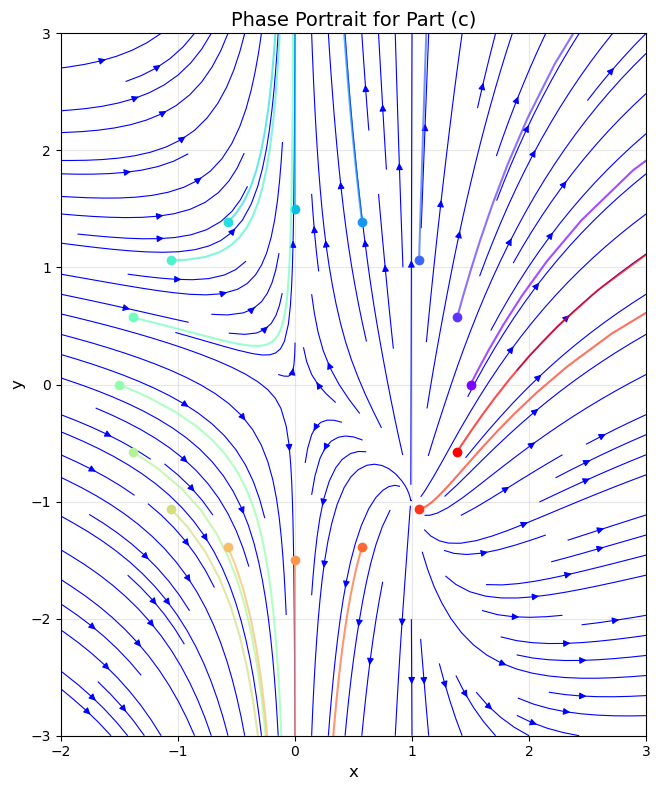

In [7]:
def plot_phase_portrait_c():
    x_range = np.linspace(-2, 3, 25)
    x2_range = np.linspace(-3, 3, 25)
    X, X2 = np.meshgrid(x_range, x2_range)
    fig, ax = plt.subplots(figsize=(10, 8))
    
    dx1 = np.zeros_like(X)
    dx2 = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx1[i, j], dx2[i, j] = dynamics_part_c(0, [X[i, j], X2[i, j]])
    
    ax.streamplot(X, X2, dx1, dx2, color='blue', linewidth=0.8, density=1.2)
    colors = plt.cm.rainbow(np.linspace(0, 1, 16))
    
    for i, color in enumerate(colors):
        angle = 2 * np.pi * i / len(colors)
        r = 1.5
        y0 = [r * np.cos(angle), r * np.sin(angle)]
        try:
            sol = solve_ivp(dynamics_part_c, [0, 50], y0, 
                           dense_output=True, max_step=0.1)
            if sol.t.size > 0:
                ax.plot(sol.y[0], sol.y[1], color=color, alpha=0.7, linewidth=1.5)
                ax.plot(sol.y[0][0], sol.y[1][0], 'o', color=color, markersize=6)
        except:
            pass
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Phase Portrait for Part (c)', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-2, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

plot_phase_portrait_c()

In [8]:
def dynamics_part_d(t, y, lamda):
    x1, x2 = y
    dx1dt = x1*(1 - x1**2)
    dx2dt = - lamda * (x2 - x1**2)
    
    return [dx1dt, dx2dt]

In [9]:
def plot_phase_portrait_d(lamda=0.5):
    x_range = np.linspace(-2, 2, 25)
    x2_range = np.linspace(-1, 2, 25)
    X, X2 = np.meshgrid(x_range, x2_range)
    fig, ax = plt.subplots(figsize=(10, 8))
    
    dx1 = np.zeros_like(X)
    dx2 = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            dx1[i, j], dx2[i, j] = dynamics_part_d(0, [X[i, j], X2[i, j]], lamda)
    
    ax.streamplot(X, X2, dx1, dx2, color='blue', linewidth=0.8, density=1.2)
    colors = plt.cm.rainbow(np.linspace(0, 1, 14))
    
    for i, color in enumerate(colors):
        angle = 2 * np.pi * i / len(colors)
        r = 1.2
        y0 = [r * np.cos(angle), r * np.sin(angle)]
        try:
            sol = solve_ivp(dynamics_part_d, [0, 50], y0, args=(lamda,), 
                           dense_output=True, max_step=0.1)
            if sol.t.size > 0:
                ax.plot(sol.y[0], sol.y[1], color=color, alpha=0.7, linewidth=1.5)
                ax.plot(sol.y[0][0], sol.y[1][0], 'o', color=color, markersize=6)
        except:
            pass
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'Question 3 a: λ = {lamda:.2f}', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 2)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

interact(plot_phase_portrait_d, lamda=FloatSlider(min=0.1, max=3, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='lamda', max=3.0, min=0.1), Output()), _dom_classes=(…

<function __main__.plot_phase_portrait_d(lamda=0.5)>

In [10]:
def map_dynamics(y, lamda, mu):
    x1, x2 = y
    x1_new = lamda * x1
    x2_new = mu * x2 - x1**3
    return [x1_new, x2_new]

In [11]:
def plot_map_evolution(lamda=-0.5, mu=0.5):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    x1_range = np.linspace(-1.5, 1.5, 15)
    x2_range = np.linspace(-1.5, 1.5, 15)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x1_range) * len(x2_range)))
    
    n_iterations = 100
    color_idx = 0
    
    for i, x1_init in enumerate(x1_range):
        for j, x2_init in enumerate(x2_range):
            y = [x1_init, x2_init]
            x1_traj, x2_traj = [y[0]], [y[1]]
            
            for _ in range(n_iterations):
                y = map_dynamics(y, lamda, mu)
                x1_traj.append(y[0])
                x2_traj.append(y[1])
            
            ax.plot(x1_traj, x2_traj, color=colors[color_idx], alpha=0.6, linewidth=0.4)
            ax.plot(x1_init, x2_init, 'o', color=colors[color_idx], markersize=2)
            
            for k in range(1, min(20, len(x1_traj)-1)):
                dx = x1_traj[k+1] - x1_traj[k]
                dy = x2_traj[k+1] - x2_traj[k]
                ax.arrow(x1_traj[k], x2_traj[k], dx*0.3, dy*0.3, 
                        head_width=0.03, head_length=0.02, linewidth=0.3,
                        fc=colors[color_idx], ec=colors[color_idx], alpha=0.6)
            
            color_idx += 1
    
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title(f'Map Evolution: λ = {lamda:.2f}, μ = {mu:.2f}', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

interact(plot_map_evolution, lamda=FloatSlider(min=-2, max=-0.01, step=0.1, value=-0.5), 
         mu=FloatSlider(min=0.01, max=3, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=-0.5, description='lamda', max=-0.01, min=-2.0), FloatSlider(value=0.5…

<function __main__.plot_map_evolution(lamda=-0.5, mu=0.5)>